In [116]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation
from sympy import *
from sympy.codegen.cfunctions import log10
    

dir = '/Users/maeda/Desktop/Feedback/'

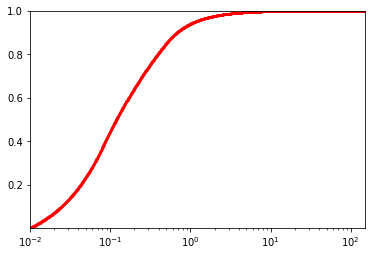

In [182]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#plt.xlim(0.1, 100)
#plt.xlim(0.000001, 1.0)
plt.ylim(0.000001, 1.0)
#plt.ylim(0.001, 0.1)
#plt.ylim(0.000000, 1.0)
#plt.ylim(0.01, 150)
plt.xlim(0.01, 150)
#ax.set_yscale('log')
ax.set_xscale('log')

data01,data02 ,data03 = np.loadtxt(dir+'IMF-K.dat', delimiter=',', unpack=True)
#plt.scatter(10.0**data01, 10.0**data03/20000.0, s=3.0,c='red')
#plt.scatter(data01, data02, s=3.0,c='red')
#plt.scatter(data02, data01, s=3.0,c='red')
plt.scatter(data01, data02, s=3.0,c='red')
#plt.scatter(data01, data03, s=3.0,c='red')

#plt.gca().set_aspect('equal')


plt.show()

pp = PdfPages('/Users/maeda/Desktop/IMF-cum.pdf')
pp.savefig(fig)
pp.close()



In [128]:
#def nonlinear_fit(x,a,b):
#    return  b * np.exp(x / (a+x)  )

#param, cov = curve_fit(nonlinear_fit, array_x, array_y)





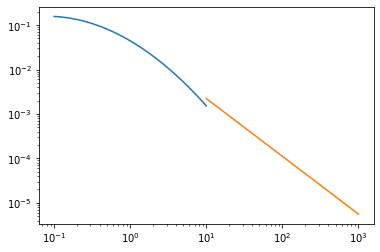

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

p1 = np.logspace( -1, 1, 100)   # linspace(min, max, N) で範囲 min から max を N 分割します
#q1 = 0.158*np.exp(-(np.log10(p1/0.079))**2.0 / 2.0/0.69/0.69) /p1/np.log(10.0)#* (1.0**(-2.3)/np.log(10.0)) / (np.exp(-(np.log10(1.0/0.079))**2.0 / 2.0/0.69/0.69) /1.0/np.log(10.0))
#q1 = 0.158*np.exp(-(np.log10(p1/0.079))**2.0 / 2.0/0.69/0.69)# /np.log(1.0)
q1 = 0.158*np.exp(-0.5*(np.log10(p1/0.079) /0.69)**2.0)
p2 = np.logspace( 1, 3, 100)   # linspace(min, max, N) で範囲 min から max を N 分割します
#q2=p2**(-2.3)/np.log(10.0) 
q2=0.0443*(p2)**(-1.3)


plt.plot(p1, q1)
plt.plot(p2, q2)

ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [6]:
a=0.158*np.exp(-0.5*((np.log10(1.0/0.079) )/ 0.69 )**2.0) /1.0/np.log(10.0)
b=(1.0)**(-2.3)

a,b

(0.01915057560284106, 1.0)

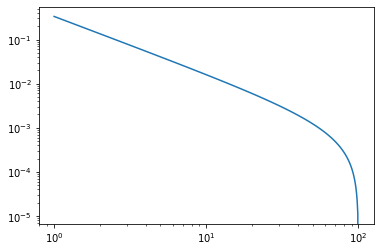

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


r1=np.linspace( 1, 100, 100)
r2=-((r1)**(-1.3) - (100.0)**(-1.3))/np.log(10)/(-1.3)

int1=-((1.0)**(-1.3) - (100.0)**(-1.3))/np.log(10)/(-1.3)




plt.plot(r1, r2)

ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


In [8]:
x = Symbol('x')
y = Symbol('y')

y = (exp( -(log10(x/0.079))**2 /2.0/0.69/0.69))/x/ln(10)
integrate(y, x)



Integral(exp(-1.0501995379122*log10(12.6582278481013*x)**2)/x, x)/log(10)

In [9]:
integrate(6*x**5, x)

x**6

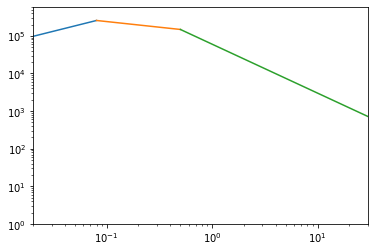

In [227]:
#Kroupa 2001
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mmax=150

coef5 = 60000.0
coef4 = (coef5*(0.5 )**(-2.3+1.0))/((0.5)**(-1.3+1.0))
coef3 = (coef4*(0.08)**(-1.3+1.0))/((0.08)**(-0.3+1.0))

coef3


p3 = np.logspace( np.log10(0.01), np.log10(0.08), 10)   # linspace(min, max, N) で範囲 min から max を N 分割します
q3 = coef3*(p3)**(-0.3+1.0)

p4 = np.logspace( np.log10(0.08), np.log10(0.5), 20)   # linspace(min, max, N) で範囲 min から max を N 分割します
q4 = coef4*(p4)**(-1.3+1.0)

p5 = np.logspace( np.log10(0.5), np.log10(mmax), 100)   # linspace(min, max, N) で範囲 min から max を N 分割します
q5 = coef5*(p5)**(-2.3+1.0)

#p2 = np.logspace( 1, 3, 100)   # linspace(min, max, N) で範囲 min から max を N 分割します
#q2=0.0443*(p2)**(-1.3)


plt.plot(p3, q3)
plt.plot(p4, q4)
plt.plot(p5, q5)

plt.xlim(0.02, 30)
plt.ylim(1, 600000)

ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

pp = PdfPages('/Users/maeda/Desktop/IMF-kroupa.pdf')
pp.savefig(fig)
pp.close()


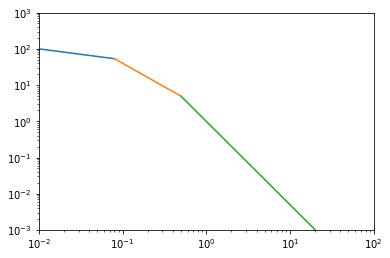

In [219]:
#https://ja.wikipedia.org/wiki/%E5%88%9D%E6%9C%9F%E8%B3%AA%E9%87%8F%E9%96%A2%E6%95%B0
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

coef5 = 1.0
coef4 = (coef5*(0.5 )**(-2.3))/((0.5)**(-1.3))
coef3 = (coef4*(0.08)**(-1.3))/((0.08)**(-0.3))

coef3


p3 = np.linspace( 0.01, 0.08, 100)  
q3 = coef3*(p3)**(-0.3)

p4 = np.linspace( 0.08, 0.5, 200)
q4 = coef4*(p4)**(-1.3)

p5 = np.linspace( 0.5, mmax, 100)   
q5 = coef5*(p5)**(-2.3)




plt.plot(p3, q3)
plt.plot(p4, q4)
plt.plot(p5, q5)


#plt.plot(p5, q5)


plt.xlim(0.01, 100)
plt.ylim(0.001, 1000)

ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

pp = PdfPages('/Users/maeda/Desktop/IMF-kroupa-dndm.pdf')
pp.savefig(fig)
pp.close()

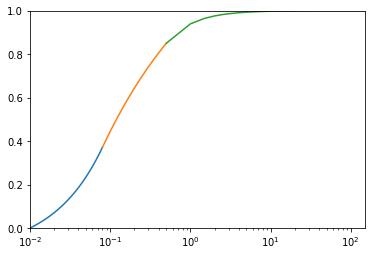

In [220]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

coef5 = 1.0
coef4 = (coef5*(0.5 )**(-2.3))/((0.5)**(-1.3))
coef3 = (coef4*(0.08)**(-1.3))/((0.08)**(-0.3))

'''
p5 = np.linspace( 0.5, mmax, 100)   
q5 = coef5*(-(mmax)**(-1.3)/1.3+(p5)**(-1.3)/1.3)

p4 = np.linspace( 0.08, 0.5, 200)
q4 = coef4*(-(0.5)**(-0.3)/0.3+(p4)**(-0.3)/0.3)+coef5*(-(mmax)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)

p3 = np.linspace( 0.01, 0.08, 100)  
q3 = coef3*((0.08)**(+0.7)/0.7-(p3)**(+0.7)/0.7)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef5*(-(mmax)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)
'''

'''
p3 = np.linspace( 0.01, 0.08, 100)  
q3 = coef3*((p3)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)

p4 = np.linspace( 0.08, 0.5, 200)
q4 = coef4*(-(p4)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)

p5 = np.linspace( 0.5, mmax, 300)   
q5 = coef5*(-(p5)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)
'''

p3 = np.linspace( 0.01, 0.08, 100)  
q3 = coef3*((p3)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)

p4 = np.linspace( 0.08, 0.5, 200)
q4 = coef4*(-(p4)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)

p5 = np.linspace( 0.5, mmax, 300)   
q5 = coef5*(-(p5)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)



ntot=coef3*((0.08)**(+0.7)/0.7-(0.01)**(+0.7)/0.7)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef5*(-(mmax)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)

q3=q3/ntot
q4=q4/ntot
q5=q5/ntot


plt.plot(p3, q3)
plt.plot(p4, q4)
plt.plot(p5, q5)

#plt.plot(p5, q5)


#plt.xlim(0.01, 150)
plt.xlim(0.01, 150)
plt.ylim(0.0000, 1)

#ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

pp = PdfPages('/Users/maeda/Desktop/IMF-kroupa-cum.pdf')
pp.savefig(fig)
pp.close()

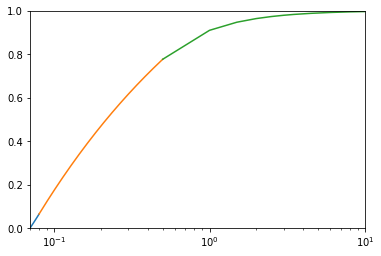

In [214]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mmin=0.07

coef3 = 1.0
coef4 = (coef3*(0.08 )**(-0.3))/((0.08)**(-1.3))
coef5 = (coef4*(0.5 )**(-1.3))/((0.5)**(-2.3))


p3 = np.linspace( mmin, 0.08, 100)  
q3 = coef3*((p3)**(+0.7)/0.7-(mmin)**(+0.7)/0.7)

p4 = np.linspace( 0.08, 0.5, 200)
q4 = coef4*(-(p4)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(mmin)**(+0.7)/0.7)

p5 = np.linspace( 0.5, mmax, 300)   
q5 = coef5*(-(p5)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(mmin)**(+0.7)/0.7)



ntot=coef3*((0.08)**(+0.7)/0.7-(mmin)**(+0.7)/0.7)+coef4*(-(0.5)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef5*(-(mmax)**(-1.3)/1.3+(0.5)**(-1.3)/1.3)

q3=q3/ntot
q4=q4/ntot
q5=q5/ntot


plt.plot(p3, q3)
plt.plot(p4, q4)
plt.plot(p5, q5)

#plt.plot(p5, q5)


#plt.xlim(0.01, 150)
plt.xlim(0.07, 10)
plt.ylim(0.0000, 1)

#ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

pp = PdfPages('/Users/maeda/Desktop/IMF-kroupa-cum.pdf')
pp.savefig(fig)
pp.close()

#coef3*((0.08)**(+0.7)/0.7-(0.07)**(+0.7)/0.7)
#(coef4*(-(0.1)**(-0.3)/0.3+(0.08)**(-0.3)/0.3)+coef3*((0.08)**(+0.7)/0.7-(0.07)**(+0.7)/0.7))/ntot

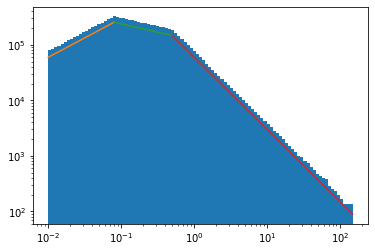

AttributeError: 'Figure' object has no attribute 'save'

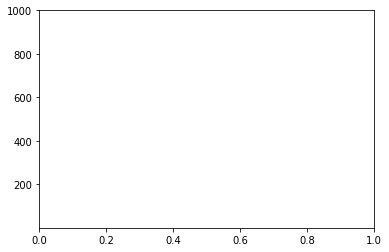

In [229]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

eata01,eata02 = np.loadtxt(dir+'Mran-K.dat', delimiter=',', unpack=True)
lgms = np.logspace( np.log10(0.01), np.log10(150), 100)  
plt.hist(eata01, bins=lgms)#, cumulative=True, density=True)
plt.xscale("log")
plt.yscale("log")

plt.plot(p3, q3)
plt.plot(p4, q4)
plt.plot(p5, q5)
plt.show()

plt.ylim(0.90000, 1000)

pp = PdfPages('/Users/maeda/Desktop/IMF-k-ran.pdf')
pp.savefig(fig)
pp.close()
fig.save('/Users/maeda/Desktop/IMF-k-ran.pdf')